In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Utility import Create_Folder
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.To_Draw import Draw_theoretical_wData as DD
import parmap
import pandas as pd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm

In [2]:
DF = 'Review/23.03.06 ensemble 50 r,rstd/'
Create_Folder(DF)

In [3]:
N =500
seeds = np.arange(0,50,1)
theta_s, omega_s = {},{}
for seed in seeds:
    theta_s[seed],omega,Kc = Normal(N,0,1,seed=seed)
    omega_s[seed] = np.sort(omega)
# theta0 = np.ones_like(theta)
dt = 0.1

m = 6
t_end=1500
t = np.arange(0,t_end+dt/2,dt)

t_=15000
t_set = np.arange(0,t_+dt/2,dt)
K = 2.5
dK =0.5

In [12]:
import glob

In [80]:
file = glob.glob('Review/*.csv')

In [81]:
ms = [float(f.split('/')[-1].split('m=')[-1].split(',')[0]) for f in file]
ms_idx = np.argsort(ms)
ms = np.sort(ms)
file = np.array(file)[ms_idx]

In [82]:
ms

array([ 0.95,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,  7.  ,  8.  , 10.  ,
       20.  ])

In [83]:
df_sets = {}
for m,i in zip(ms,file):
    df_sets[m] =pd.read_csv(i,index_col= [0,1])

In [84]:
seeds = np.arange(0,50,1)

In [85]:
dK = 0.5
Ks = np.arange(1,15,dK)

In [87]:
stds_set = {}
mean_rs_set = {}
for m in ms:
    df_set = {}
    df_s = df_sets[m]
    for seed in seeds:
        df_set[seed] = df_s.loc[seed]
    stds = []
    mean_rs = []
    for df in df_set.values():
        # plt.errorbar(Ks,df.r_mean,df.r_std,fmt='d')
        stds.append(df.r_std.to_list())
        mean_rs.append(df.r_mean.to_list())
    stds_set[m] = np.array(stds)
    mean_rs_set[m] = np.array(mean_rs)

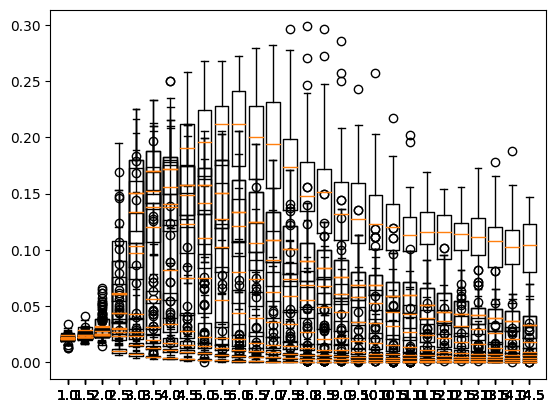

In [88]:
for m in ms:
    ln = plt.boxplot(stds_set[m],positions=Ks,labels=Ks,widths=dK*0.8)
# plt.xticks(Ks,Ks);

In [105]:
Draw_set = {}
for m in ms:
    Draw_set[m] = DD(m)

In [106]:
A = Draw_set[m]

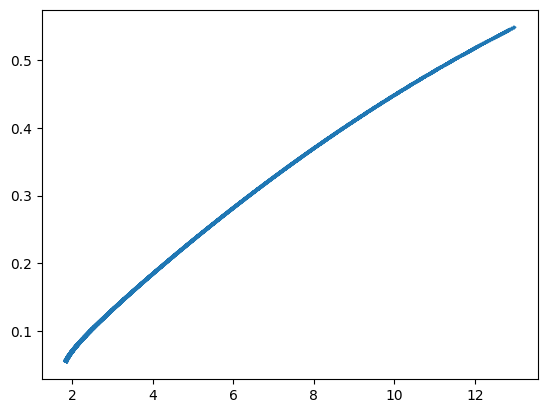

In [108]:
fow = A.foward()

In [111]:
fow.get_color()

'Tab:blue'

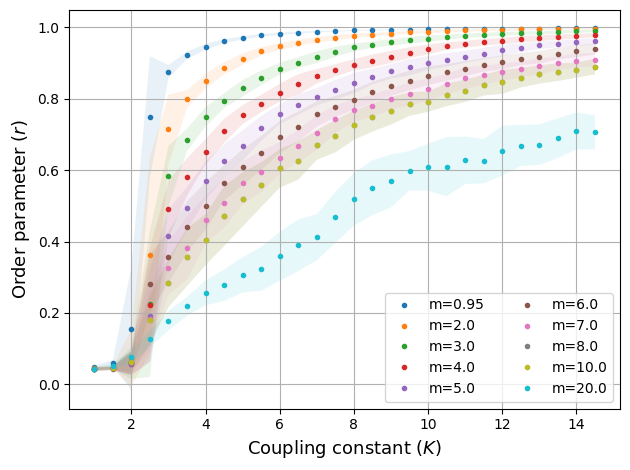

In [126]:
for m in ms[:]:
    mean_r = np.mean(mean_rs_set[m],axis=0)
    std_r = np.std(mean_rs_set[m],axis=0)
    l, = plt.plot(Ks,mean_r,'.',label =f'm={m}')
    plt.fill_between(Ks,mean_r-std_r,mean_r+std_r,alpha=0.1)
    c = l.get_color()
    # A = Draw_set[m]
    # l_t = A.foward(label=False)
    # l_t.set_color(c)
    # l_t.set_linestyle('--')
    # l_t.set_alpha(0.3)


plt.grid()
plt.legend(ncol=2)
plt.xlabel(r'Coupling constant ($K$)',fontsize=13)
plt.ylabel(r'Order parameter ($r$)',fontsize=13)

# plt.xticks(Ks,Ks);
plt.tight_layout()
plt.savefig(DF+'K vs r ensemble 50.png',dpi=400)

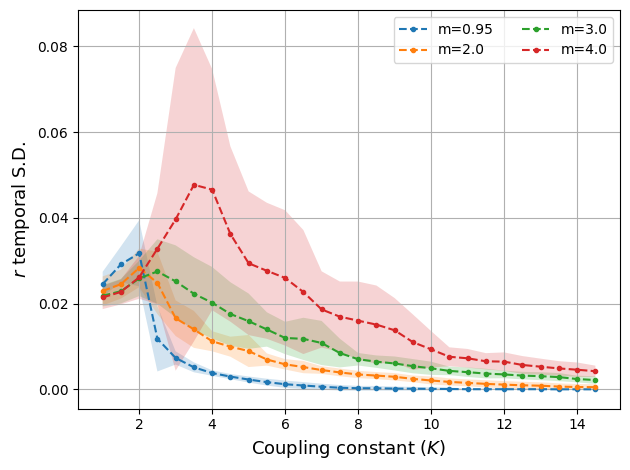

In [200]:
Create_Folder(DF+'m_set std/')
max_K = []
m_set = ''

for m in ms[:4]:
    mean_rstd = np.mean(stds_set[m],axis=0)
    std_rstd = np.std(stds_set[m],axis=0)
    plt.plot(Ks,mean_rstd,'.--',label =f'm={m}')
    plt.fill_between(Ks,mean_rstd-std_rstd,mean_rstd+std_rstd,alpha=0.2)
    
    max_K.append(Ks[np.argmax(mean_rstd)])
    m_set+= f'{m}'
plt.legend()

plt.grid()
plt.legend(ncol=2)
plt.xlabel(r'Coupling constant ($K$)',fontsize=13)
plt.ylabel(r'$r$ temporal S.D.',fontsize=13)
plt.tight_layout()

plt.savefig(DF+'m_set std/'+f'K vs r std m={m_set}.png',dpi=400)

# plt.xticks(Ks,Ks);

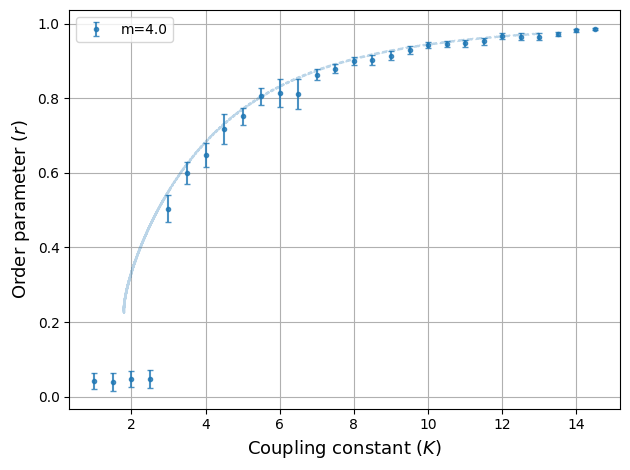

In [203]:
m_set = ''
for m in ms[3:4]:
    mean_r = np.mean(mean_rs_set[m],axis=0)
    std_r = np.std(mean_rs_set[m],axis=0)
    err = plt.errorbar(Ks,mean_rs_set[m][i,:],stds_set[m][i,:],fmt='.',capsize=2,label =f'm={m}',alpha=0.8 )
    # l, = plt.plot(0*Ks,0*mean_r,'.',label =f'm={m}',alpha=)

    c = err.get_children()[0].get_color()
    A = Draw_set[m]
    l_t = A.foward(label=False)

    l_t.set_color(c)
    l_t.set_linestyle('--')
    l_t.set_alpha(0.3)
    m_set+= f'{m}'


plt.grid()
plt.legend(ncol=2)
plt.xlabel(r'Coupling constant ($K$)',fontsize=13)
plt.ylabel(r'Order parameter ($r$)',fontsize=13)

# plt.xticks(Ks,Ks);
plt.tight_layout()

plt.savefig(DF+'m_set std/'+f'K vs r ensemble 50 m={m_set}.png',dpi=400)


In [187]:
err.get_children()[0].get_color()

'#2ca02c'

In [207]:
m = 3

In [ ]:
# plt.plot(Ks,mean_rs_set[m][0,:])
Create_Folder(DF+'temp3/')
for i in range(10):
    A = Draw_set[m]
    plt.figure()
    lc = A.foward()
    lc.set_alpha(0.4)
    
    plt.errorbar(Ks,mean_rs_set[m][i,:],stds_set[m][i,:],fmt='.',capsize=2 )
    plt.xlabel(r'Coupling constant ($K$)',fontsize=13)
    plt.ylabel(r'Order parameter ($r$)',fontsize=13)
    plt.grid()
    plt.tight_layout()

    plt.savefig(DF+'temp3/'+f'K vs r sample {i}.png',dpi=400)

# stds_set[m]

In [251]:
N =500
omega = np.sort(omega)
# theta0 = np.ones_like(theta_random)
mean_r = lambda x: np.mean(x[-500:])
std_r = lambda x: np.std(x[-500:])
m = 6
Ks = np.arange(1,10,0.1)
seed =10
# theta,omega,Kc = Normal(N,0,1,seed=seed)
theta_random,omega,Kc = Q_Normal(N,0,1,seed=10)
omega = np.sort(omega)
df = pd.DataFrame({'theta':np.zeros_like(Ks),'dtheta':np.zeros_like(Ks),'rs':np.zeros_like(Ks)},index=Ks,dtype=object)
for i,(K,(df.theta[K],df.dtheta[K],df.rs[K])) in enumerate(zip(Ks,parmap.map(mf2,Ks,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega,pm_processes=8,pm_pbar=False))):pass
df['r_mean'] = df.rs.apply(mean_r)
df['r_std'] = df.rs.apply(std_r)    

In [9]:
m

6

In [248]:
Draw_ = DD(m)

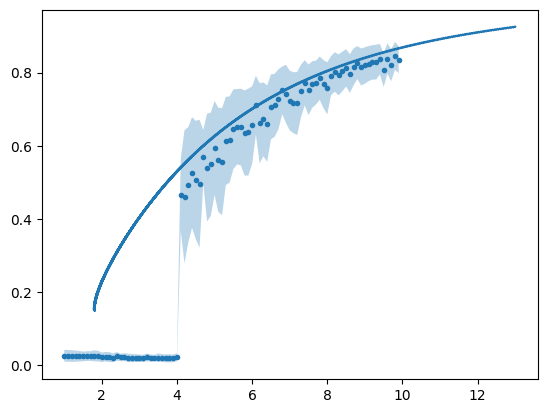

In [252]:
# plt.errorbar(Ks,df.r_mean,df.r_std)
Draw_.foward()
plt.fill_between(Ks,df.r_mean-df.r_std,df.r_mean+df.r_std,alpha= 0.3)
plt.plot(Ks,df.r_mean,'.')

In [102]:
# for seed in tqdm(seeds):
#     df = pd.DataFrame({'rs':np.zeros_like(Ks)},index=Ks,dtype=object)
# # rdf = pd.DataFrame({'theta':np.zeros_like(Ks),'dtheta':np.zeros_like(Ks)},index=Ks,dtype=object)
#     theta,omega = theta_s[seed],omega_s[seed]
#     for i,(K,(df.rs[K])) in enumerate(zip(Ks,parmap.map(sim,Ks,N=N,m=m,t_array=t,p_theta=theta,p_dtheta= omega,p_omega=omega,pm_processes=15,pm_pbar=False))):pass
#     df['r_mean'] = df.rs.apply(mean_r)
#     df['r_std'] = df.rs.apply(std_r)    
#     df_set[seed] = df
# # for i,(K,(rdf.theta[K],rdf.dtheta[K])) in enumerate(zip(Ks,parmap.map(sim,Ks,N=N,m=m,t_array=t,p_theta=theta0,p_dtheta= np.zeros_like(omega),p_omega=omega,pm_processes=15,pm_pbar=True))):pass


  0%|          | 0/50 [00:00<?, ?it/s]

NameError: name 'df_set' is not defined

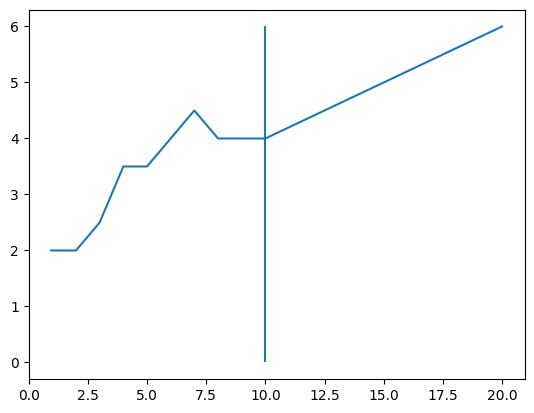

In [ ]:
plt.plot(ms,max_K)
plt.vlines([10],[0],[6])

In [ ]:
stds_set = {}
mean_rs_set = {}
for m in ms:
    df_s
for df in df_set.values():
    # plt.errorbar(Ks,df.r_mean,df.r_std,fmt='d')
    stds.append(df.r_std.to_list())
    mean_rs.append(df.r_mean.to_list())
    plt.plot(Ks,df.r_std,'.')

In [145]:
np.argmax(df.r_std)

13

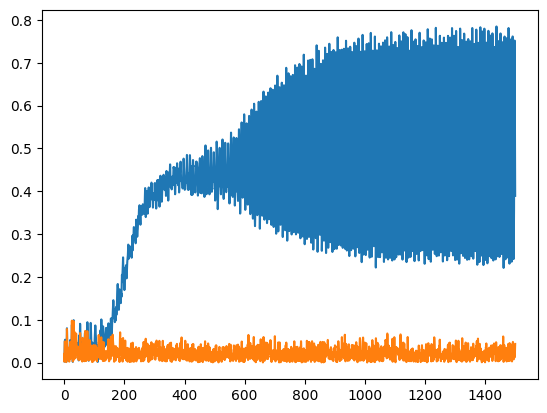

In [253]:
plt.plot(t,df.iloc[np.argmax(df.r_std)].rs)
idx = 14
plt.plot(t,df.iloc[idx].rs)

In [149]:
Ks[14]

2.4000000000000012

In [254]:
# theta_ = df.iloc[idx].theta[7000:7000,:]
theta_ = df.iloc[np.argmax(df.r_std)].theta[12000:13000,:]
dtheta_ = df.iloc[np.argmax(df.r_std)].dtheta[12000:13000,:]
dtheta = df.iloc[np.argmax(df.r_std)].dtheta

In [255]:
Aij = np.zeros((500,500))
Pij = np.zeros_like(1j*Aij)
for t_ in theta_:
    i,j = np.meshgrid(t_,t_)
    Pij += np.exp(1j*(i-j))
aPij = np.abs(Pij)/100

In [256]:
def make_phase_avg_correlation(idx):
    theta_ = df.iloc[idx].theta[-1000:,:]
    Aij = np.zeros((500,500))
    Pij = np.zeros_like(1j*Aij)
    for t_ in theta_:
        i,j = np.meshgrid(t_,t_)
        Pij += np.exp(1j*(i-j))
    aPij = np.abs(Pij)/1000
    return aPij

In [263]:
theta_ = df.iloc[np.argmax(df.r_std)].theta[12000:13000,:]
dtheta_ = df.iloc[np.argmax(df.r_std)].dtheta[12000:13000,:]
dtheta = df.iloc[np.argmax(df.r_std)].dtheta

In [264]:
Aij = np.zeros((500,500))
Pij = np.zeros_like(1j*Aij)
for t_ in theta_:
    i,j = np.meshgrid(t_,t_)
    Pij += np.exp(1j*(i-j))
    

In [265]:
aPij = np.abs(Pij)/1000

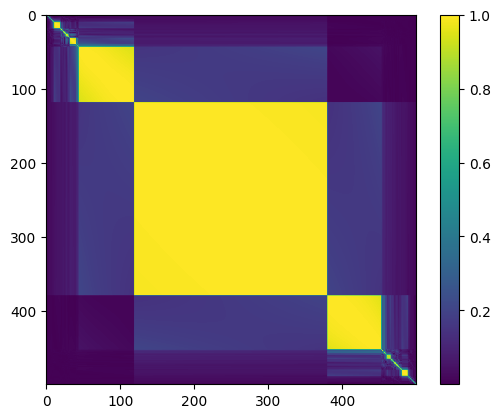

In [266]:
plt.imshow(aPij)
plt.colorbar()

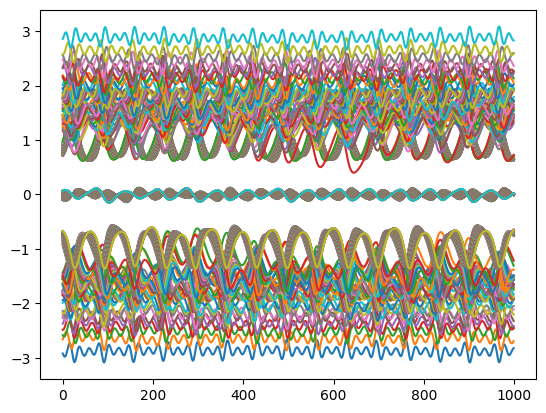

In [267]:
plt.plot(dtheta_);

In [268]:
theta.shape

(500,)

In [269]:
np.sum(theta_)

-23970.20622763413

In [270]:
theta_ = df.iloc[np.argmax(df.r_std)].dtheta[7000,:]


In [271]:
i_d,j_d = np.meshgrid(theta_,theta_)

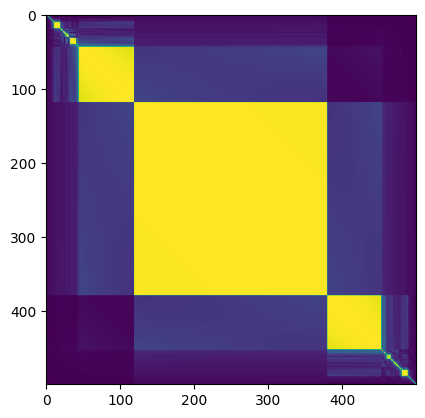

In [272]:
plt.imshow(aPij)

In [274]:
theta_ = df.iloc[np.argmax(df.r_std)].theta


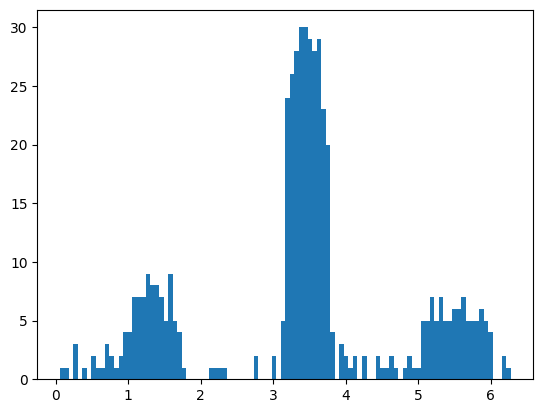

In [275]:
plt.hist(theta_[-1,:]%(2*np.pi),bins=100);


In [94]:
idx = np.argmax(df.r_std)
# idx = -1
theta = df.iloc[idx].theta
rs = df.iloc[idx].rs


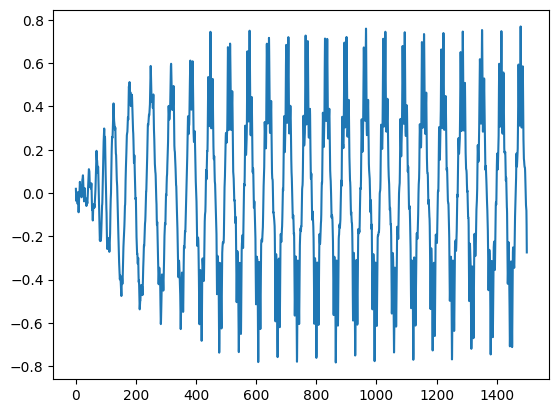

In [95]:
sign =np.sum(np.sin(theta)/N,axis=1)
plt.plot(t,sign)

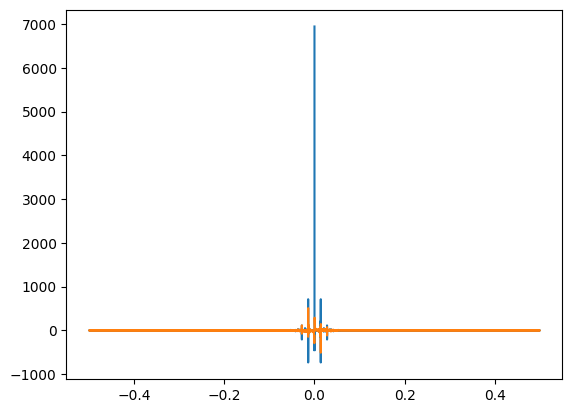

In [98]:
# t = np.arange(256)
# sp = np.fft.fft(sign)
sp = np.fft.fft(rs)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
# plt.xlim(0)
# plt.ylim(0,100)

In [25]:
plt.plot(t,rs)


NameError: name 'rs' is not defined

In [26]:
# phase velocity mean in time interval
mean = lambda data,x,time: np.mean(data[x:x+time],axis=0)

In [27]:
dtheta_ = df.iloc[np.argmax(df.r_std)].dtheta

In [28]:
Ks[np.argmax(df.r_std)]

3.8000000000000025

In [29]:
len(dtheta_)

15001

In [276]:
dtheta_ = df.iloc[np.argmax(df.r_std)].dtheta

In [277]:
time = 1000
i = 0
data = np.mean(dtheta_[i:i+time],axis=0)
max_idx = len(dtheta_)
for i in range(1,max_idx-time):
    data= np.c_[data,np.mean(dtheta_[i:i+time],axis=0)]

In [278]:

NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))

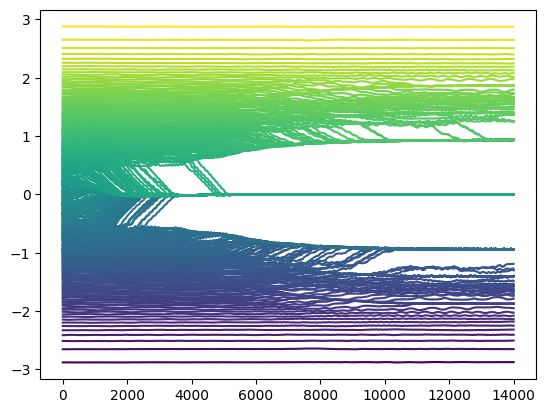

In [279]:
color = plt.cm.viridis(NORM(omega))
ln = plt.plot(data.T);
for i,l in enumerate(ln):
    l.set_color(color[i])

In [ ]:
seed =10
theta,omega,Kc = Q_Normal(N,0,1,seed=seed)
omega = np.sort(omega)
df = pd.DataFrame({'theta':np.zeros_like(Ks),'dtheta':np.zeros_like(Ks),'rs':np.zeros_like(Ks)},index=Ks,dtype=object)
for i,(K,(df.theta[K],df.dtheta[K],df.rs[K])) in enumerate(zip(Ks,parmap.map(mf2,Ks,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega,pm_processes=8,pm_pbar=False))):pass
df['r_mean'] = df.rs.apply(mean_r)
df['r_std'] = df.rs.apply(std_r)    

In [363]:
Ks[np.argmax(df.r_std)]

4.200000000000003

In [58]:
seed =10
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,2000,0.1)
K = 3.5
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

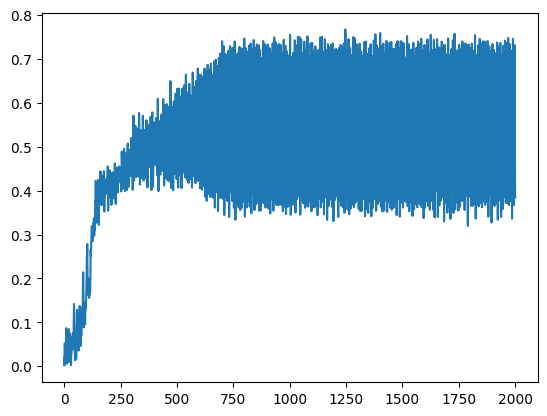

In [59]:
plt.plot(t,rs)

In [52]:
dtheta_ = dtheta[:,:]

In [53]:
dtheta_.shape

(50000, 500)

In [66]:
dtheta_c = np.cumsum(dtheta,axis=0)

In [67]:
time = 1000

In [68]:
data = (dtheta_c[time:]-dtheta_c[:-time])/1000

In [64]:
data.shape

(19000, 500)

In [65]:
# time = 1000
# i = 0
# data = []
# data.append( np.mean(dtheta_[i:i+time],axis=0))
# max_idx = len(dtheta_)
# for i in range(1,max_idx-time):
#     data.append(np.mean(dtheta_[i:i+time],axis=0))


NameError: name 'dtheta_' is not defined

In [43]:
data = np.array(data)

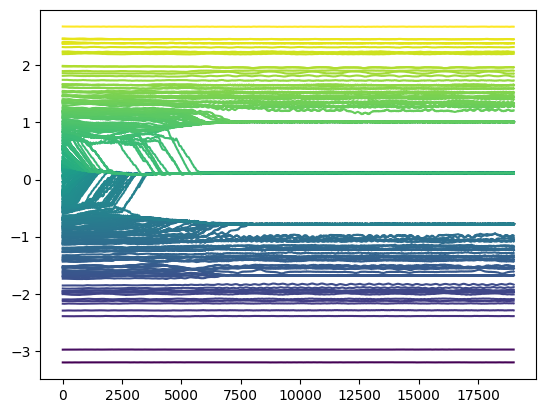

In [69]:
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
ln = plt.plot(data);
for i,l in enumerate(ln):
    l.set_color(color[i])

In [98]:
interval = [10,20,50,100,200,500,1000]
# theta_ = theta[000:2000]
theta_ = theta[15000:17000]
dtheta_ = dtheta[15000:17000]
# theta_c = np.cumsum(theta_)

In [99]:
dtheta_c = np.cumsum(dtheta_,axis=0)

In [107]:
np.max(dtheta_c[10]/10)

2.888672907265575

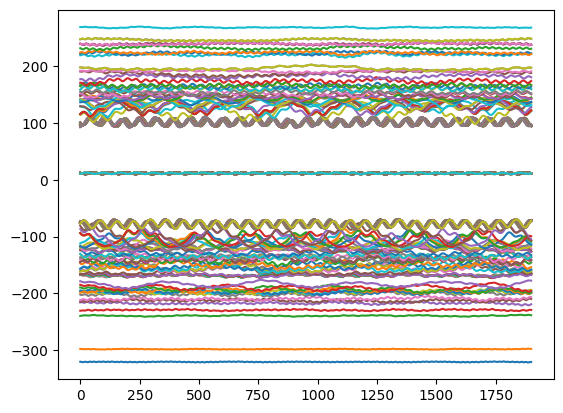

In [102]:
plt.plot(dtheta_c[100:]-dtheta_c[:-100])

In [93]:
Aij = np.zeros((len(theta_),500,500),'complex64')
exp_theta = np.exp(1j*theta_)
for i,e_ in enumerate(exp_theta):
    i_,j_ = np.meshgrid(e_,e_)
    Aij[i,:,:] = i_/j_
# Pij = np.abs(np.sum(Aij,axis=0))/len(theta_)

In [94]:
Aij_c = np.cumsum(Aij,axis=0)

In [95]:
Aij_c[inter].shape

(500, 500)

In [110]:
Pij_set = {}
dtheta_set = {}
count = {}
for inter in interval:
    Pij = abs(Aij_c[inter])/inter
    Pij_set[inter]=Pij
    dtheta_set[inter] = dtheta_c[inter]/inter

In [111]:
inter

1000

2.6923584060445993
2.6809284534079802
2.679859023680397


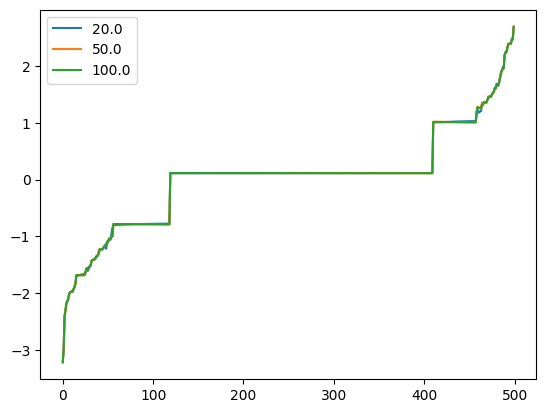

In [124]:
for inter in interval[4:]:
    print(np.max(dtheta_set[inter]))
    plt.plot(dtheta_set[inter],label = f'{inter*0.1:.01f}')
plt.legend()

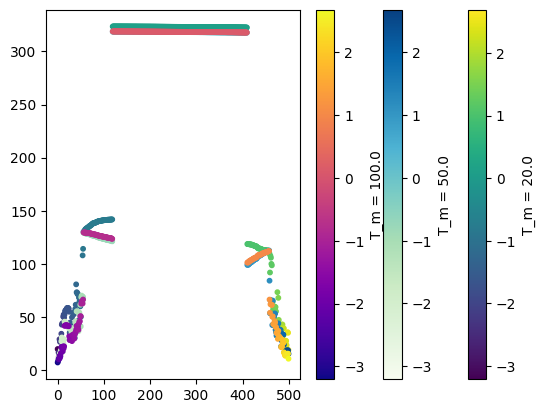

In [137]:
cmap = ['viridis','GnBu','plasma']
for i,inter in enumerate(interval[4:]):
    # plt.figure()
    plt.scatter(range(N),np.sum(Pij_set[inter],axis=0),c=dtheta_set[inter],s=10,cmap=cmap[i])
    cbar = plt.colorbar()

    cbar.set_label(f'T_m = {inter*0.1:.01f}')

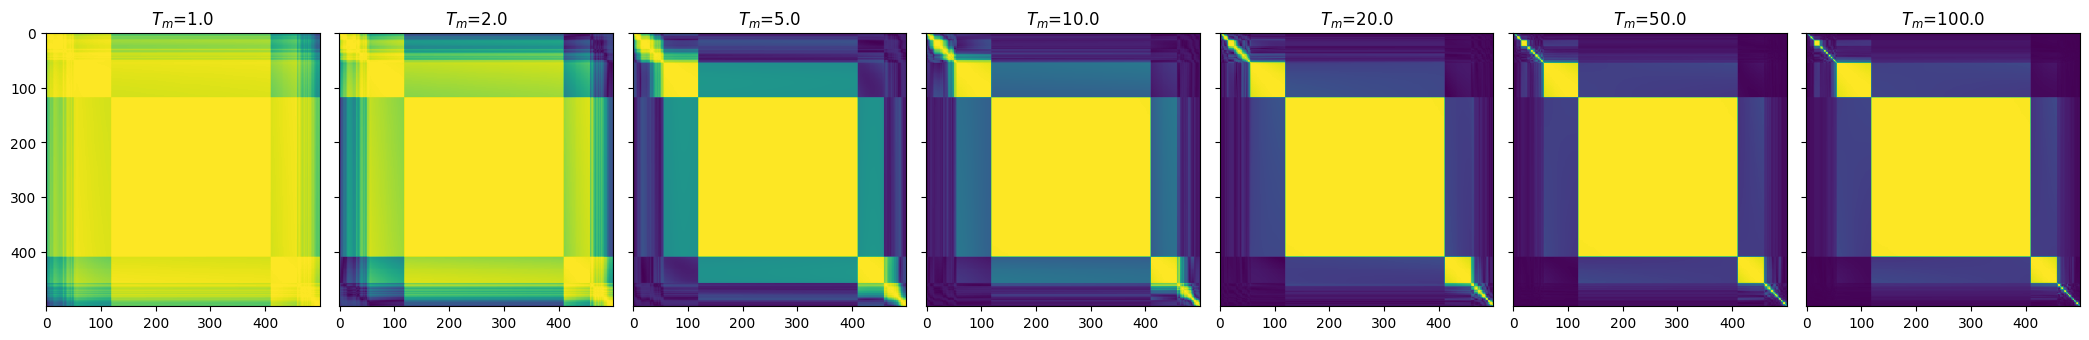

In [97]:
fig, axs = plt.subplots(1,len(interval),figsize=(len(interval)*3,4),sharex=True,sharey=True)
for i,(sec,ax) in enumerate(zip(interval,axs)):
    plt.sca(ax)
    plt.imshow(Pij_set[sec])
    plt.title(r'$T_m$'+f'={sec*0.1:.01f}')
plt.tight_layout()
plt.savefig(DF+'T_m set.png',dpi=400)

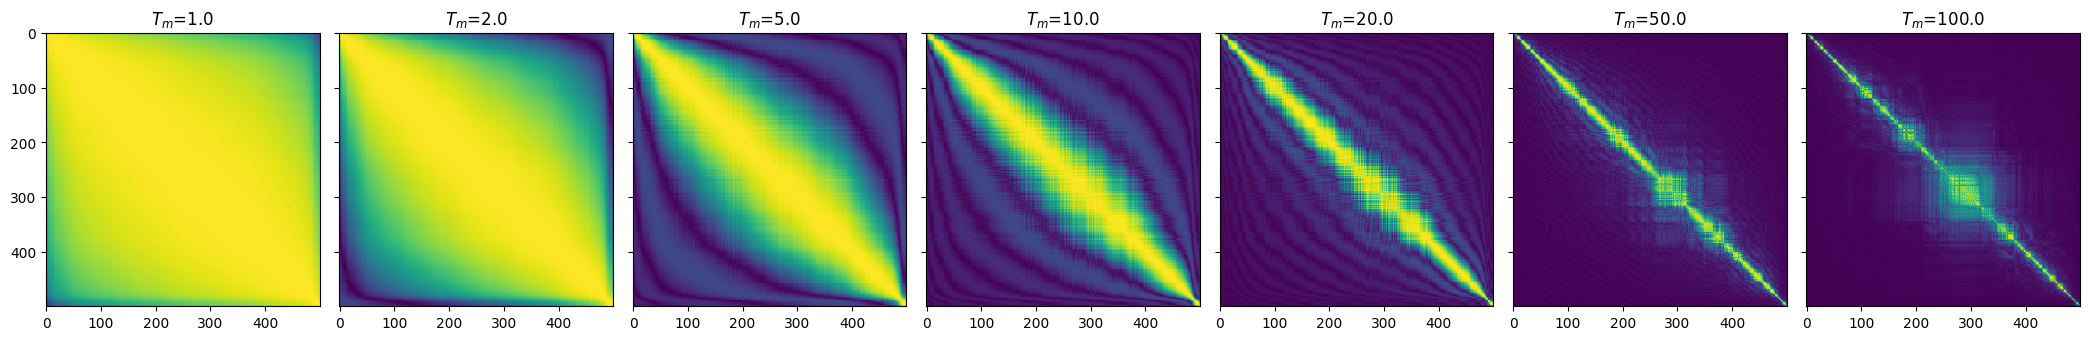

In [87]:
fig, axs = plt.subplots(1,len(interval),figsize=(len(interval)*3,4),sharex=True,sharey=True)
for i,(sec,ax) in enumerate(zip(interval,axs)):
    plt.sca(ax)
    plt.imshow(Pij_set[sec])
    plt.title(r'$T_m$'+f'={sec*0.1:.01f}')
plt.tight_layout()
plt.savefig(DF+'T_m set first.png',dpi=400)

In [529]:
(e_-e_.reshape(-1)).shape

(500,)

In [63]:
t_ = theta_[-1,:]
i_t,j_t = np.meshgrid(t_,t_)

In [64]:
aPij = np.abs(Pij)/1000

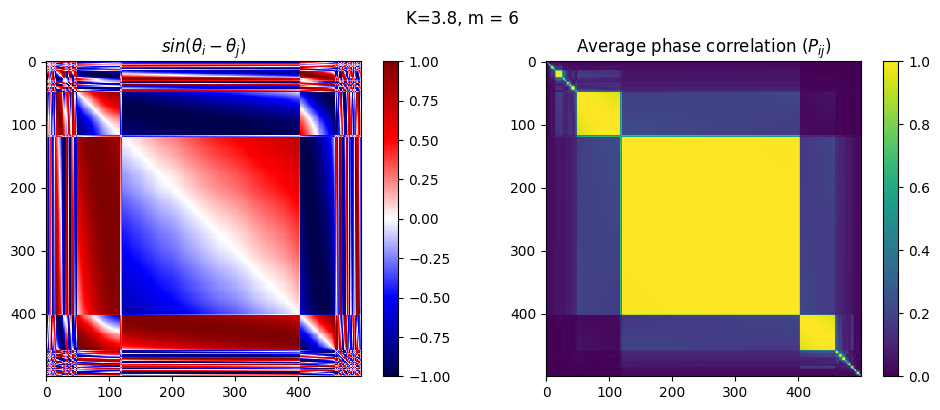

In [68]:
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(10,4))
plt.sca(ax1)
plt.imshow(np.sin(i_t-j_t),vmin=-1,vmax=1,cmap = 'seismic')
plt.colorbar()
plt.title(r'$sin(\theta_i-\theta_j)$')
plt.sca(ax2)
plt.imshow( Pij,vmin=0,vmax=1)
plt.title(r'Average phase correlation ($P_{ij}$)')
plt.colorbar()
plt.suptitle(f'K={K}, m = {m}')
plt.tight_layout()
plt.savefig(DF+'correlation.png',dpi=400)

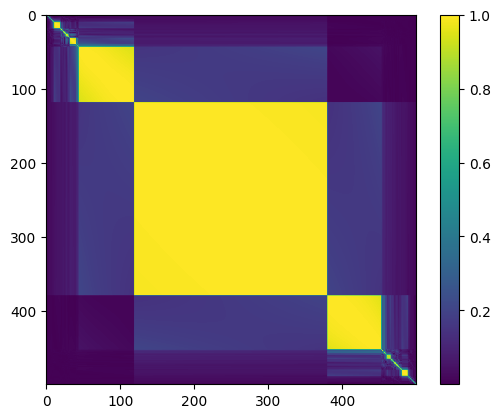

In [294]:
# linear, log, symlog, asinh, logit, function, functionlog
plt.imshow(aPij)
plt.colorbar()

In [4]:
temp = aPij.copy()

NameError: name 'aPij' is not defined

In [5]:
temp1 = np.where(temp>0.7,1,0)

NameError: name 'temp' is not defined

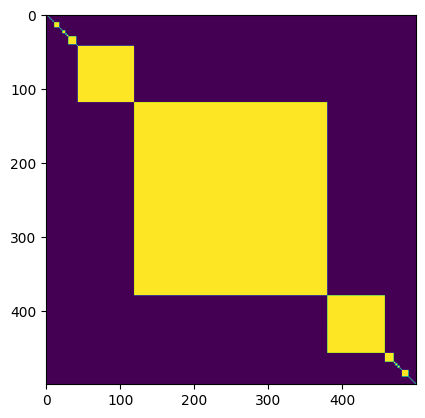

In [342]:
plt.imshow(temp1)

In [3]:
plt.plot(np.sum(temp,axis=1))
plt.grid()

NameError: name 'temp' is not defined

(array([  2.,   8.,  32.,  14.,  64., 283.,  29.,  45.,  13.,  10.]),
 array([-3.19549336, -2.59841297, -2.00133259, -1.40425221, -0.80717182,
        -0.21009144,  0.38698894,  0.98406933,  1.58114971,  2.1782301 ,
         2.77531048]),
 <BarContainer object of 10 artists>)

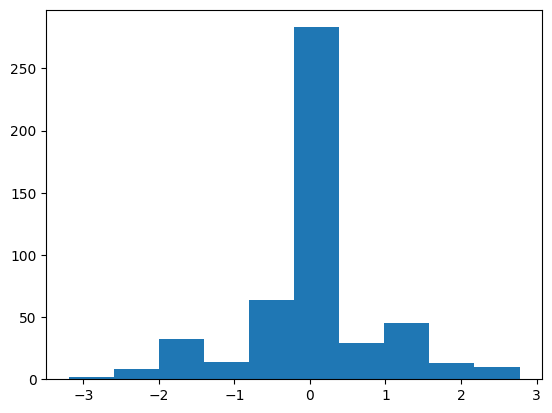

In [218]:
plt.hist(dtheta.T[:,-1])

(array([ 64.,  45.,  53.,  20.,  55.,   0.,   0.,   0.,   0., 263.]),
 array([0.00863905, 0.06458424, 0.12052944, 0.17647464, 0.23241983,
        0.28836503, 0.34431023, 0.40025542, 0.45620062, 0.51214582,
        0.56809101]),
 <BarContainer object of 10 artists>)

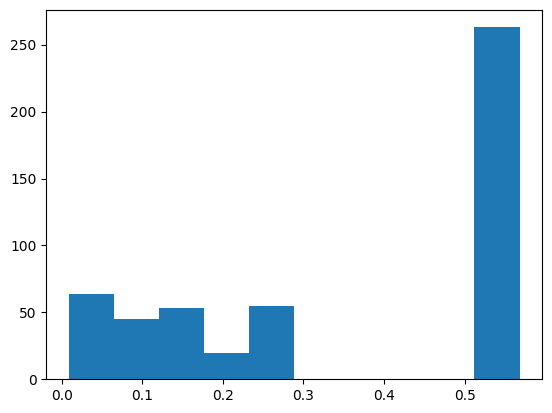

In [165]:
plt.hist(np.mean(aPij,axis=1),bins=10)

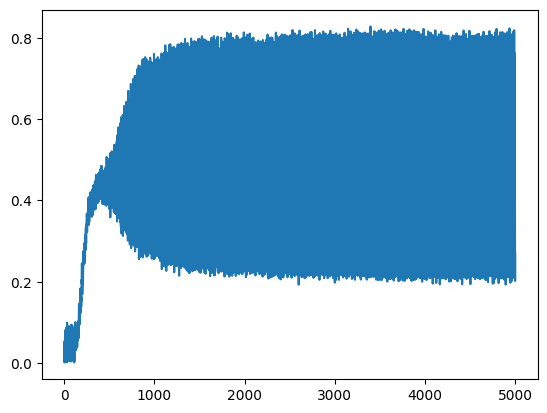

In [282]:
plt.plot(t,rs)

In [548]:
time = 200
i = 0
rstd = np.mean(rs[i:i+time],axis=0)
max_idx = len(dtheta)
for i in range(1,max_idx-time):
    rstd= np.r_[rstd,np.mean(rs[i:i+time],axis=0)]

In [549]:
rstd[-1]

0.5104986898009798

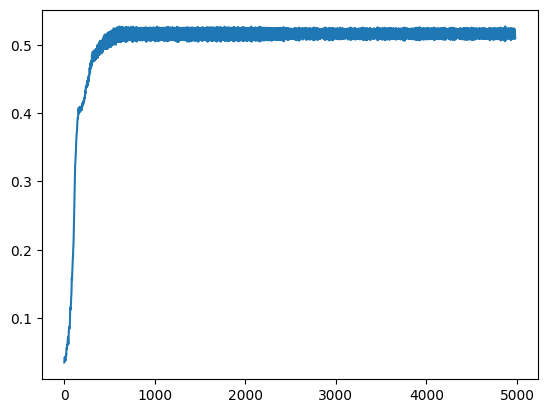

In [550]:
plt.plot(t[:-200],rstd)

# animation 만들기

In [7]:
seed =10
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,1500,0.1)
K = 3.5
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

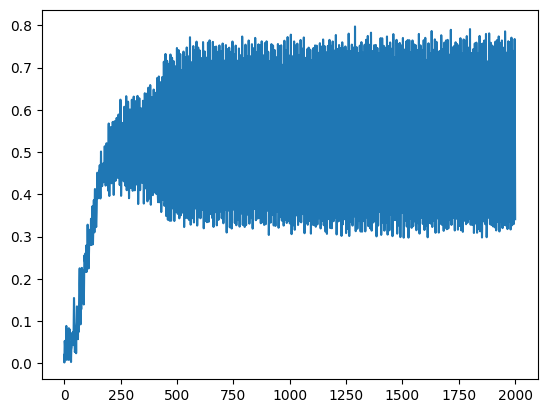

In [44]:
plt.plot(t,rs)

In [9]:
theta_ = theta[6000:10000]

In [10]:
Aij = np.zeros((len(theta),500,500),'complex128')
exp_theta = np.exp(1j*theta)
for i,e_ in enumerate(exp_theta):
    i_,j_ = np.meshgrid(e_,e_)
    Aij[i,:,:] = i_/j_
# Pij = np.abs(np.sum(Aij,axis=0))/len(theta_)

: 

: 

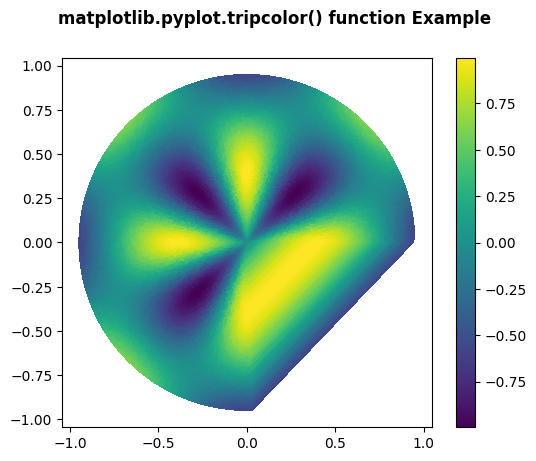

In [143]:
# Implementation of matplotlib function
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
   
   
ang = 100
rad = 100
radm = 0.0
radii = np.linspace(radm, 0.95, rad)
   
angles = np.linspace(0, 1.5 * np.pi, ang)
angles = np.repeat(angles[..., np.newaxis], rad,
                   axis = 1)
  
angles[:, 1::2] += np.pi / ang
   
x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.sin(4 * radii) * np.cos(4 * angles)).flatten()
   
triang = tri.Triangulation(x, y)
triang.set_mask(np.hypot(x[triang.triangles].mean(axis = 1),
                         y[triang.triangles].mean(axis = 1))
                < radm)
   
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tpc = ax1.tripcolor(triang, z, shading ='flat')
fig1.colorbar(tpc)
  
fig1.suptitle('matplotlib.pyplot.tripcolor() function\
 Example\n\n', fontweight ="bold")
plt.show()